# Project Summary: Client Subscribed to a Term Deposit

In [39]:
# Bank Term Deposit Prediction - Simplified Version
# Purpose: Predict whether a bank client will subscribe to a term deposit ("y" column)
# Dataset: bankmarketing.csv

# 1. Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [41]:
# 2. Load Data
df=pd.read_csv("bankmarketing.csv")

In [43]:
# 3. Prepare Target Variable
# Convert 'y' column from 'yes'/'no' to 1/0
df['y']=df['y'].map({'yes':1,'no':0})


In [45]:
# 4. Split Features and Target
X=df.drop("y",axis=1)
y=df["y"]


In [47]:
# 5. Identify Numeric and Categorical Columns
numeric_features=X.select_dtypes(include=['int64','float64']).columns
categorical_features=X.select_dtypes(include=['object']).columns
print(numeric_features,categorical_features)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object') Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [49]:
# 6. Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [51]:
# 7. Create Model Pipeline (Preprocessing + Logistic Regression)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500))
])


In [53]:
# 8. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [55]:
# 9. Train Model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=500))])

In [57]:
# 10. Predictions
y_pred = model.predict(X_test)

In [59]:
# 11. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9166059723233795

Confusion Matrix:
 [[7146  164]
 [ 523  405]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



In [61]:
# 12. Cross-validation

#Check the model’s stability by running k-fold cross-validation.

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.89354212 0.83612527 0.87897548 0.6204929  0.61490834]
Mean Accuracy: 0.7688088225598038


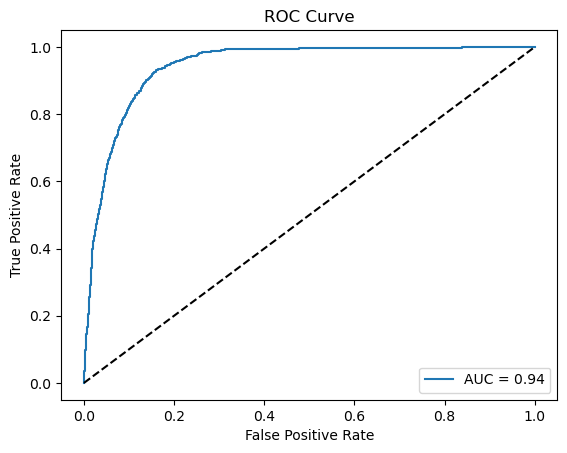

In [63]:
# 13. ROC Curve & AUC

# Helps visualize how well the model separates the classes.

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc_score(y_test, y_proba)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [65]:
# 14. Feature Importance

# See which factors influence predictions the most (for Logistic Regression, look at coefficients).

model_fit = model.named_steps["classifier"]
feature_names = model.named_steps["preprocessor"].transformers_[0][2].tolist() + \
                list(model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({"Feature": feature_names, "Coefficient": model_fit.coef_[0]})
print(importance_df.sort_values(by="Coefficient", ascending=False))


              Feature  Coefficient
50          month_mar     1.640903
1            duration     1.199467
6      cons.price.idx     1.177989
8           euribor3m     0.610467
46          month_aug     0.509778
..                ...          ...
44  contact_telephone    -0.657522
52          month_nov    -0.719316
51          month_may    -0.754961
49          month_jun    -0.766027
5        emp.var.rate    -2.600061

[63 rows x 2 columns]



## Introduction

This project involves analyzing data from a bank's marketing campaign to predict whether a client will subscribe to a term deposit.
The dataset includes various attributes such as job, marital status, education, default status, balance, and other socio-economic indicators.
The goal is to build a classification model and derive insights that can improve future campaign strategies.



## What We Did

- Loaded and inspected the `bankmarketing.csv` dataset.
- Handled missing values and performed necessary data cleaning.
- Conducted exploratory data analysis (EDA) to identify key patterns and relationships.
- Encoded categorical variables and normalized numerical features.
- Split the data into training and testing sets.
- Trained and evaluated multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest).
- Measured model performance using accuracy, precision, recall, and F1-score.



## What We Learned

- Variables such as `contact`, `poutcome`, `month`, and `duration` were among the most significant predictors for term deposit subscription.
- The marketing campaign was more effective during certain months, particularly around May and August.
- A longer call duration was correlated with a higher likelihood of subscription.
- Ensemble models like Random Forest generally performed better in predictive accuracy.



## Conclusion

This analysis helped in identifying critical factors that influence a client's decision to subscribe to a term deposit.
By focusing on these key variables and optimizing marketing outreach strategies, banks can improve customer conversion rates.
The project also demonstrates the importance of data preprocessing, exploratory analysis, and model evaluation in making data-driven decisions.
